<a href="https://colab.research.google.com/github/vin-thomas/BBC_news_classification/blob/main/BBC_BoW_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
import glob
import warnings
import re

In [2]:
warnings.filterwarnings('ignore')

##**Data Download**

In [3]:
URL = "http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip" 
!wget -P 'Data/' $URL

!unzip "/content/Data/bbc-fulltext.zip" -d 'Data/'

--2022-02-20 08:54:05--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874078 (2.7M) [application/zip]
Saving to: ‘Data/bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  3.55MB/s    in 0.8s    

2022-02-20 08:54:06 (3.55 MB/s) - ‘Data/bbc-fulltext.zip’ saved [2874078/2874078]

Archive:  /content/Data/bbc-fulltext.zip
   creating: Data/bbc/
   creating: Data/bbc/business/
  inflating: Data/bbc/business/001.txt  
  inflating: Data/bbc/business/002.txt  
  inflating: Data/bbc/business/003.txt  
  inflating: Data/bbc/business/004.txt  
  inflating: Data/bbc/business/005.txt  
  inflating: Data/bbc/business/006.txt  
  inflating: Data/bbc/business/007.txt  
  inflating: Data/bbc/business/008.txt  
  inflating: Data/bbc/business/009.txt  
  inflating: Data/bbc/business/010.txt  
  inflatin

In [4]:
file_names= glob.iglob('/content/Data/bbc/**/*.txt', recursive= True)

In [5]:
def get_filename (file_name):
  return (file_name.split('/')[-2])

In [6]:
def get_content(file_name):
  with open (file_name, 'rb') as file:
    content = file.read ()
    file.close()
    pass
    return (content)

In [7]:
df= pd.DataFrame(columns= ['category', 'content'])
for file_name in file_names:
  df = df.append (pd.DataFrame([[get_filename(file_name), get_content(file_name)]], columns= ['category', 'content']))

In [8]:
df

,category,content
0,sport,b'England claim Dubai Sevens glory\n\nEngland ...
0,sport,b'Ferguson fears Milan cutting edge\n\nManches...
0,sport,b'Corry backs skipper Robinson\n\nEngland forw...
0,sport,b'Williams stays on despite dispute\n\nMatt Wi...
0,sport,"b""Arsenal through on penalties\n\nArsenal win ..."
...,...,...
0,politics,b'Kelly trails new discipline power\n\nTeacher...
0,politics,b'Abortion not a poll issue - Blair\n\nTony Bl...
0,politics,b'Watchdog probes e-mail deletions\n\nThe info...
0,politics,b'\'More to do\' on adult literacy\n\nThe gove...


##**Data Exploration**

In [9]:
group = df.groupby('category')
chart= group.count()

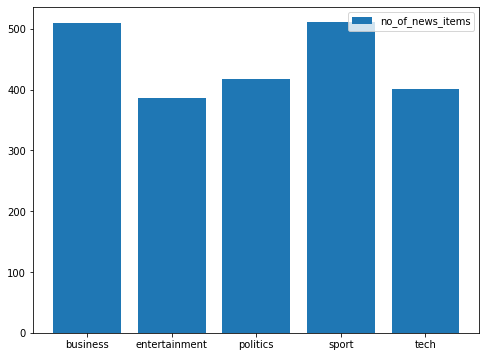

In [10]:
fig= plt.figure(figsize=(8,6))

plt.bar(chart.index, chart.content, label= 'no_of_news_items')
plt.legend()
plt.show ()

In [11]:
df['category_id']= df['category'].factorize()[0]

In [12]:
df = df[['content', 'category', 'category_id']]

In [13]:
df

,content,category,category_id
0,b'England claim Dubai Sevens glory\n\nEngland ...,sport,0
0,b'Ferguson fears Milan cutting edge\n\nManches...,sport,0
0,b'Corry backs skipper Robinson\n\nEngland forw...,sport,0
0,b'Williams stays on despite dispute\n\nMatt Wi...,sport,0
0,"b""Arsenal through on penalties\n\nArsenal win ...",sport,0
...,...,...,...
0,b'Kelly trails new discipline power\n\nTeacher...,politics,4
0,b'Abortion not a poll issue - Blair\n\nTony Bl...,politics,4
0,b'Watchdog probes e-mail deletions\n\nThe info...,politics,4
0,b'\'More to do\' on adult literacy\n\nThe gove...,politics,4


##**Data Preprocessing**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

count_vectorizer = CountVectorizer(preprocessor=preprocess_text)

vectorizer = CountVectorizer(stop_words= 'english', decode_error= 'ignore', strip_accents='ascii', ngram_range=(1,2), max_df=0.8, min_df= 0.01, preprocessor=preprocess_text)




In [15]:
X = vectorizer.fit_transform(df['content'])
df_bow = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [16]:
type(X), X.shape

(scipy.sparse.csr.csr_matrix, (2225, 3007))

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
features_new = tsne.fit_transform(df_bow)

In [18]:
df_tsne = pd.DataFrame(features_new)

In [19]:
df_tsne.columns= ['A','B']

In [20]:
df_tsne ['C'] = df['category_id'].values
df_tsne

,A,B,C
0,53.271317,5.923339,0
1,20.813854,9.623679,0
2,46.582298,6.980009,0
3,12.234591,3.899662,0
4,20.436832,2.973184,0
...,...,...,...
2220,47.158154,17.590509,4
2221,-46.955841,-6.144525,4
2222,-21.452986,-33.483002,4
2223,-26.012482,8.664358,4


In [21]:
group = df_tsne.groupby('C')

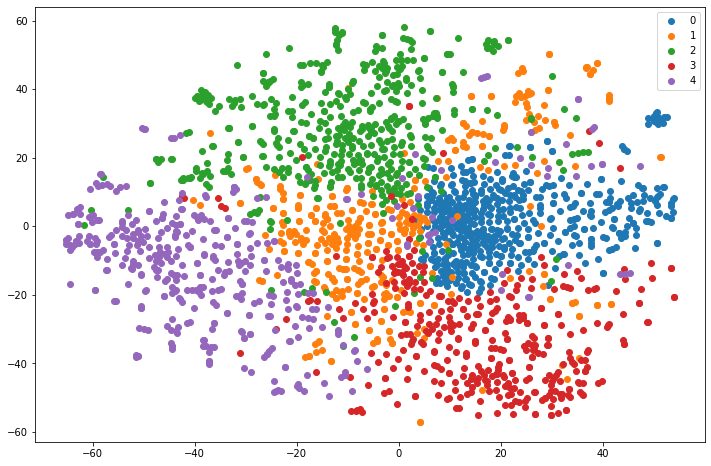

In [22]:
fig = plt.figure(figsize= (12,8))

for name, group in group:
  plt.scatter(group.A, group.B, label= name)
  plt.legend()


In [23]:
X.shape, type(X)

((2225, 3007), scipy.sparse.csr.csr_matrix)

In [24]:
features = df_bow
labels= df['category_id'].values

In [25]:
df_bow

,ability,able,abroad,absence,absolutely,abuse,academy,accept,accepted,access,according,account,accounting,accounts,accused,achieve,achieved,achievement,acknowledged,act,acting,action,actions,activities,activity,actor,actors,actress,acts,actually,add,added,adding,addition,additional,address,adds,administration,admitted,adopted,...,world,world biggest,world cup,world largest,world number,world said,world service,worldwide,worried,worries,worry,worrying,worse,worst,worth,wouldn,write,writer,writers,writing,written,wrong,wrote,xbox,year,year ago,year earlier,year old,year said,year year,years,years ago,yen,yes,york,young,young people,younger,yukos,zealand
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2222,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


##**Classification**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import classification_report

models = [
          ('KNN', KNeighborsClassifier()), ('SVC', SVC()), 
          ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=3 )), ('Gradient Descent',SGDClassifier()), ('Logistic Regression', LogisticRegression(random_state=0))
         ]
for name, model in models:
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)
  print (name, accuracy)

KNN 0.6857142857142857
SVC 0.9578231292517007
Random Forest 0.8625850340136054
Gradient Descent 0.963265306122449
Logistic Regression 0.9741496598639455
